## Import libraries and config Pandas display

In [8]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.6 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 4.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 6.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.6 MB 8.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.6 MB 8.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 9.6 MB/s eta 0:00:01
   ------

In [9]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 930.9 kB/s eta 0:01:48
   ---------------------------------------- 0.3/99.8 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.5/99.8 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.7/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 1.1/99.8 MB 3.8 MB/s eta 0:00:27
    --------------------------------------- 1.5/99.8 MB 4.4 MB/s eta 0:00:23
    --------------------------------------- 2.0/99.8 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 2.4/99.8 MB 5.6 MB/s eta 0:00:18
   - -------------------------------------- 2.9/99.8 MB 6.0 MB/s eta 0:00:17
   - -------------------------------------- 3.4/99.8 MB 6.4 MB/s eta 0:00:16
   - ----

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import xgboost as xg
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [11]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 100

## Import datasets

In [12]:
winery = pd.read_csv("../data/Winery_Data_Clean.csv")
winery.head()

,CustomerID,OrderID,CustomerSegment,Date,ZipCode,State,Sales2008,Sales2009,Sales2010,SaleAmount,Orders2008,Orders2009,Orders2010,YearAcquired,EmailSubscr,NewsletterSubscr,WinemakerCallSubscr,Division,Region,Channel
0,1,1532,High Roller,2008-07-08,33467,FL,213.0,30903.1,13340.94,44.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom
1,1,14378,High Roller,2008-10-05,33467,FL,213.0,30903.1,13340.94,47.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom
2,1,17690,High Roller,2008-10-26,33467,FL,213.0,30903.1,13340.94,57.0,4,8,4,2008,True,True,True,South Atlantic,South,Newsletter
3,1,19808,High Roller,2008-11-08,33467,FL,213.0,30903.1,13340.94,65.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom
4,1,25406,High Roller,2009-01-02,33467,FL,213.0,30903.1,13340.94,3889.0,4,8,4,2008,True,True,True,South Atlantic,South,TastingRoom


In [13]:
customer = pd.read_csv("../data/Winery_Customer.csv")
customer.head()

,CustomerID,OrderVolume,CustomerSegment,ZipCode,State,SaleAmount,YearAcquired,EmailSubscr,NewsletterSubscr,WinemakerCallSubscr,Division,Region
0,1,16,High Roller,33467,FL,44457.05,2008,True,True,True,South Atlantic,South
1,2,9,High Roller,98683,WA,42201.67,2009,False,True,True,Pacific,West
2,3,8,High Roller,90247,CA,28393.50,2005,True,True,True,Pacific,West
3,4,7,Wine Enthusiast,4572,ME,23571.14,2008,True,True,True,New England,Northeast
4,5,5,Casual Visitor,98042,WA,20631.10,2008,False,False,False,Pacific,West


In [14]:
customer.dtypes

CustomerID               int64
OrderVolume              int64
CustomerSegment         object
ZipCode                  int64
State                   object
SaleAmount             float64
YearAcquired             int64
EmailSubscr               bool
NewsletterSubscr          bool
WinemakerCallSubscr       bool
Division                object
Region                  object
dtype: object

## Predictive Models

### Binary Classification

#### Random Forest

##### Email Subscription

In [15]:
y = customer.loc[:, "EmailSubscr"].values
X = customer.loc[:, ["OrderVolume", "CustomerSegment", "Region", "SaleAmount", "NewsletterSubscr", "WinemakerCallSubscr"]]

In [16]:
### TODO: manually define categorical encoding

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object', 'bool']).apply(label_encoder.fit_transform)
# x_categorical

x_numerical = X.select_dtypes(exclude=['object', 'bool']).values
# x_numerical

x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis='columns').values
# print(type(x))

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [18]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, Y_train)

predictions = regressor.predict(X_test)
r2 = r2_score(Y_test, predictions)

feature_importances = regressor.feature_importances_

for feature, importance in zip(["OrderVolume", "CustomerSegment", "Region", "SaleAmount", "NewsletterSubscr", "WinemakerCallSubscr"]
                               , feature_importances):
    print(f"{feature}:{importance:.4f}")

accuracy = accuracy_score(Y_test, np.round(predictions))
precision = precision_score(Y_test, np.round(predictions))
recall = recall_score(Y_test, np.round(predictions))
f1score = f1_score(Y_test, np.round(predictions))

print()
print("Acc", accuracy, "Prec", precision, "Rec", recall, "f1", f1score)

OrderVolume:0.0398
CustomerSegment:0.0983
Region:0.0294
SaleAmount:0.0198
NewsletterSubscr:0.1271
WinemakerCallSubscr:0.6856

Acc 0.9342434584755404 Prec 0.8813892529488859 Rec 0.925671025464556 f1 0.9029875797247399


##### WinemakerCall Subscription

In [19]:
y = customer.loc[:, "WinemakerCallSubscr"].values 
X = customer.loc[:, ["OrderVolume", "CustomerSegment", "Region", "SaleAmount", "NewsletterSubscr", "EmailSubscr"]]

In [20]:
### TODO: print categorical encoding

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object', 'bool']).apply(label_encoder.fit_transform)

x_numerical = X.select_dtypes(exclude=['object', 'bool']).values

x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis='columns').values

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [21]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, Y_train)

predictions = regressor.predict(X_test)
r2 = r2_score(Y_test, predictions)

feature_importances = regressor.feature_importances_

for feature, importance in zip(["OrderVolume", "CustomerSegment", "Region", "SaleAmount", "NewsletterSubscr", "EmailSubscr"]
                               , feature_importances):
    print(f"{feature}: {importance:.4f}")

accuracy = accuracy_score(Y_test, np.round(predictions))
precision = precision_score(Y_test, np.round(predictions))
recall = recall_score(Y_test, np.round(predictions))
f1score = f1_score(Y_test, np.round(predictions))

print()
print("Acc", accuracy, "Prec", precision, "Rec", recall, "f1", f1score)

OrderVolume: 0.0607
CustomerSegment: 0.1605
Region: 0.0113
SaleAmount: 0.0259
NewsletterSubscr: 0.0157
EmailSubscr: 0.7258

Acc 0.9035267349260523 Prec 0.9617224880382775 Rec 0.7926760563380282 f1 0.8690549722050649


##### Newsletter Collaboration

In [22]:
y = customer.loc[:, "NewsletterSubscr"].values 
X = customer.loc[:, ["OrderVolume", "CustomerSegment", "Region", "SaleAmount", "WinemakerCallSubscr", "EmailSubscr"]]

In [23]:
### TODO: print categorical encoding

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object', 'bool']).apply(label_encoder.fit_transform)

x_numerical = X.select_dtypes(exclude=['object', 'bool']).values

x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis='columns').values

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [24]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, Y_train)

predictions = regressor.predict(X_test)
r2 = r2_score(Y_test, predictions)

feature_importances = regressor.feature_importances_

for feature, importance in zip(["OrderVolume", "CustomerSegment", "Region", "SaleAmount", "WinemakerCallSubscr", "EmailSubscr"]
                               , feature_importances):
    print(f"{feature}: {importance:.4f}")

accuracy = accuracy_score(Y_test, np.round(predictions))
precision = precision_score(Y_test, np.round(predictions))
recall = recall_score(Y_test, np.round(predictions))
f1score = f1_score(Y_test, np.round(predictions))

print()
print("Acc", accuracy, "Prec", precision, "Rec", recall, "f1", f1score)

OrderVolume: 0.0909
CustomerSegment: 0.4272
Region: 0.0581
SaleAmount: 0.0827
WinemakerCallSubscr: 0.0340
EmailSubscr: 0.3072

Acc 0.6641638225255972 Prec 0.7533913043478261 Rec 0.7384930105693829 f1 0.7458677685950413


### Multinomial Classification

#### KNN

In [126]:
customer["CustomerSegment"].value_counts()

CustomerSegment
Casual Visitor     10531
Luxury Estate       5460
Wine Enthusiast     3619
High Roller         2364
Name: count, dtype: int64

In [127]:
y = customer.loc[:, "CustomerSegment"].values
X = customer.loc[:, ["OrderVolume", "Region", "SaleAmount", "NewsletterSubscr", "WinemakerCallSubscr", "EmailSubscr"]]

label_encoder = LabelEncoder()
X["Region"] = label_encoder.fit_transform(X["Region"])

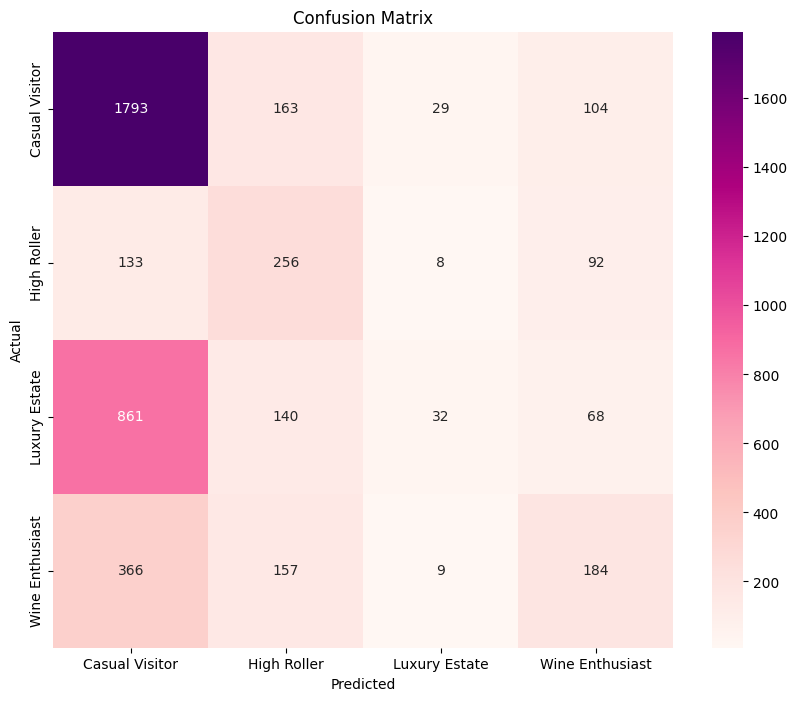

133


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

k = int(np.round(np.sqrt(len(X_train))))
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(k)

In [129]:
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions, average='weighted')
recall = recall_score(y_test, knn_predictions, average='weighted')
f1 = f1_score(y_test, knn_predictions, average='weighted')

print("Acc", accuracy, "Prec", precision, "Rec", recall, "f1", f1score)

Acc 0.515358361774744 Prec 0.4797593666656571 Rec 0.515358361774744 f1 0.8690549722050649


### Regression

#### XGBoost

In [130]:
winery.columns

Index(['CustomerID', 'OrderID', 'CustomerSegment', 'Date', 'ZipCode', 'State',
       'Sales2008', 'Sales2009', 'Sales2010', 'SaleAmount', 'Orders2008',
       'Orders2009', 'Orders2010', 'YearAcquired', 'EmailSubscr',
       'NewsletterSubscr', 'WinemakerCallSubscr', 'Division', 'Region',
       'Channel'],
      dtype='object')

In [131]:
y = winery.loc[:, "SaleAmount"].values
X = winery.loc[:, ["Channel", "Region", "CustomerSegment", "NewsletterSubscr", "WinemakerCallSubscr", "EmailSubscr"]]

label_encoder = LabelEncoder()
X["Channel"] = label_encoder.fit_transform(X["Channel"])
X["CustomerSegment"] = label_encoder.fit_transform(X["CustomerSegment"])
X["Region"] = label_encoder.fit_transform(X["Region"])

X.dtypes


Channel                int32
Region                 int32
CustomerSegment        int32
NewsletterSubscr        bool
WinemakerCallSubscr     bool
EmailSubscr             bool
dtype: object

In [132]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                      test_size = 0.2, random_state = 0) 
  
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 10, seed = 0) 
  
# Fitting the model 
xgb_r.fit(train_X, train_y) 
  
# Predict the model 
pred = xgb_r.predict(test_X) 
  
# RMSE Computation 
rmse = np.sqrt(mean_squared_error(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  294.610511


In [133]:
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)
plt.show()

ValueError: All arrays must be of the same length

#### Simple Linear

In [ ]:
y = winery.loc[:, "SaleAmount"].values
X = winery.loc[:, ["Channel", "Region", "CustomerSegment", "NewsletterSubscr", "WinemakerCallSubscr", "EmailSubscr"]]

label_encoder = LabelEncoder()
X["Channel"] = label_encoder.fit_transform(X["Channel"])
encoding_channel = {label: encoded_label for encoded_label, label in enumerate(label_encoder.classes_)}


X["CustomerSegment"] = label_encoder.fit_transform(X["CustomerSegment"])
encoding_segment = {label: encoded_label for encoded_label, label in enumerate(label_encoder.classes_)}


X["Region"] = label_encoder.fit_transform(X["Region"])
encoding_region = {label: encoded_label for encoded_label, label in enumerate(label_encoder.classes_)}


In [ ]:
print(encoding_channel)
print(encoding_region)
print(encoding_segment)

{'Email': 0, 'Newsletter': 1, 'TastingRoom': 2, 'WinemakerCall': 3}
{'Midwest': 0, 'Northeast': 1, 'South': 2, 'West': 3}
{'Casual Visitor': 0, 'High Roller': 1, 'Luxury Estate': 2, 'Wine Enthusiast': 3}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

simple_regr = LinearRegression()
simple_regr.fit(X_train, y_train)


LinearRegression()

In [ ]:
simple_pred = simple_regr.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(mean_squared_error(y_test, simple_pred)) 
print("RMSE : % f" %(rmse))

RMSE :  297.874221


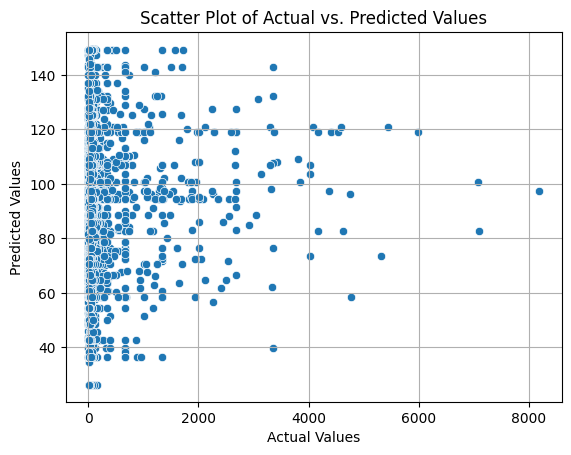

In [ ]:
sns.scatterplot(x = y_test, y = simple_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
y_test.mean()
# np.median(y_test)
# np.ptp(y_test, axis=0)

85.42336629001882